# Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import array_to_img

C:\Users\sidha\AppData\Local\Temp\ipykernel_3396\843066902.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Data Preparation

In [2]:
PATH = "..\\archive\\Img"

In [3]:
df = pd.read_csv(r"C:\Users\sidha\Desktop\Tarran\Github\itpm\archive\kannada.csv")

## Data description
- img : is the name of the image in the data folder
- class : is the corresponding label for the image

In [4]:
df.head()

,img,class
0,Img/img001-001.png,1
1,Img/img001-002.png,1
2,Img/img001-003.png,1
3,Img/img001-004.png,1
4,Img/img001-005.png,1


- the data has 16425 pictures with 657 classes

In [6]:
print(df.info)

<bound method DataFrame.info of                       img  class
0      Img/img001-001.png      1
1      Img/img001-002.png      1
2      Img/img001-003.png      1
3      Img/img001-004.png      1
4      Img/img001-005.png      1
...                   ...    ...
16420  Img/img657-021.png    657
16421  Img/img657-022.png    657
16422  Img/img657-023.png    657
16423  Img/img657-024.png    657
16424  Img/img657-025.png    657

[16425 rows x 2 columns]>


- img column is of type string
- class is of type int

In [7]:
df.dtypes

img      object
class     int64
dtype: object

- As we can see the data is balanced with no bias towards any particular class

In [8]:
df['class'].value_counts()

class
1      25
433    25
435    25
436    25
437    25
       ..
221    25
222    25
223    25
224    25
657    25
Name: count, Length: 657, dtype: int64

- creating a map to map the image name to it sorresponding class
- this will be used later when the images are being read

In [9]:
map = dict(df.values)

In [10]:
map

{'Img/img001-001.png': 1,
 'Img/img001-002.png': 1,
 'Img/img001-003.png': 1,
 'Img/img001-004.png': 1,
 'Img/img001-005.png': 1,
 'Img/img001-006.png': 1,
 'Img/img001-007.png': 1,
 'Img/img001-008.png': 1,
 'Img/img001-009.png': 1,
 'Img/img001-010.png': 1,
 'Img/img001-011.png': 1,
 'Img/img001-012.png': 1,
 'Img/img001-013.png': 1,
 'Img/img001-014.png': 1,
 'Img/img001-015.png': 1,
 'Img/img001-016.png': 1,
 'Img/img001-017.png': 1,
 'Img/img001-018.png': 1,
 'Img/img001-019.png': 1,
 'Img/img001-020.png': 1,
 'Img/img001-021.png': 1,
 'Img/img001-022.png': 1,
 'Img/img001-023.png': 1,
 'Img/img001-024.png': 1,
 'Img/img001-025.png': 1,
 'Img/img002-001.png': 2,
 'Img/img002-002.png': 2,
 'Img/img002-003.png': 2,
 'Img/img002-004.png': 2,
 'Img/img002-005.png': 2,
 'Img/img002-006.png': 2,
 'Img/img002-007.png': 2,
 'Img/img002-008.png': 2,
 'Img/img002-009.png': 2,
 'Img/img002-010.png': 2,
 'Img/img002-011.png': 2,
 'Img/img002-012.png': 2,
 'Img/img002-013.png': 2,
 'Img/img002

In [11]:
def getData():
    '''getData is a function that returns the training data in the form of X and y where X is the image as a numpy array and y is the corresponding class'''
    X = []
    y = []
    for imgName in os.listdir(PATH):
            try:
                img = cv2.imread(os.path.join(PATH,imgName))
                img_scaled = cv2.resize(img,(128,128))
                img_grayscale = cv2.cvtColor(img_scaled, cv2.COLOR_BGR2GRAY) 
                X.append(img_grayscale)
                y.append(map["Img/"+imgName]-1)
            except Exception as e:
                pass
    return X,y

In [12]:
def normalize(X):
    '''normalizing the input image'''
    X = np.array(X)
    return X/255
def listToArray(y):
    return np.array(y)

In [13]:
X,y = getData() # extracting the images

In [13]:
len(X)

16425

In [14]:
len(y)

16425

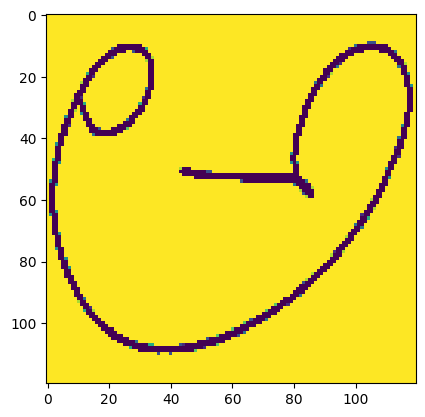

In [15]:
plt.imshow(X[0]) # sample character

In [16]:
y[0]

0

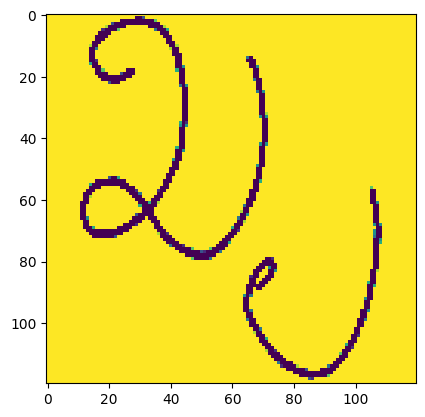

In [17]:
plt.imshow(X[1000]) # sample character

In [18]:
y[1000]

40

In [19]:
print(X[1].shape)

(120, 120)


In [14]:
X = listToArray(X)

In [15]:
y = listToArray(y)

In [22]:
X

array([[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       ...,

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1.

In [23]:
y

array([  0,   0,   0, ..., 656, 656, 656])

In [18]:
np.save("imageArray2",X)

In [17]:
np.save("classes",y)

In [26]:
df['class'].nunique()

657